# Digit recognition using the MNIST dataset

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/), officially known as "The MNIST Database of Handwritten Digits," is a famous dataset used to train machine-learning models (and neural networks) to recognize handwritten digits. Each digit in the dataset consists of a 28x28 array of numbers representing pixel values from 0 to 255. In this example, we will use Keras to build and train a neural network on the MNIST dataset. The dataset is included in Keras as a sample dataset, so we'll begin by loading it and examining its content and structure.

![](Images/mnist.png)

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images: ' + str(test_images.shape))
print('test_labels: ' + str(test_labels.shape))

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


Here's what the first scanned, handwritten digit looks like in numerical form.

In [2]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

And here's what it looks like when plotted.

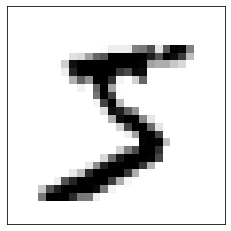

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(train_images[0], cmap=plt.cm.gray_r)

Plot the first 50 images and show the corresponding labels.

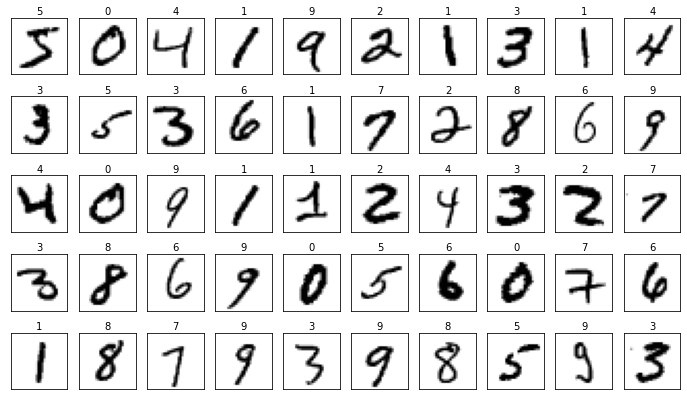

In [4]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(train_labels[i]), transform=ax.transAxes)

Plot the distribution of the samples to make sure the dataset is well balanced.

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

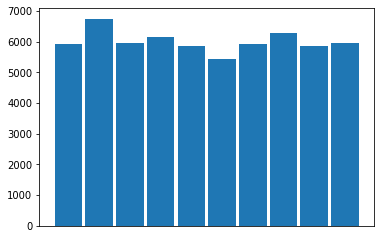

In [5]:
plt.xticks([])
plt.hist(train_labels, rwidth=0.9)

Prepare the input data by flattening the pixel arrays, normalizing the pixel values by dividing them by 255, and one-hot-encoding the labels 0-9 with Keras's [`to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function.

In [6]:
from tensorflow.keras.utils import to_categorical

x_train = train_images.reshape(60000, 28 * 28) / 255
x_test = test_images.reshape(10000, 28 * 28) / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Create a neural network with a `softmax` output layer for classification.

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=28 * 28))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Call `fit` to train the model.

In [8]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 8s 941us/step - loss: 0.4757 - accuracy: 0.8637 - val_loss: 0.1490 - val_accuracy: 0.9578
Epoch 2/10
1200/1200 [==============================] - 1s 648us/step - loss: 0.1367 - accuracy: 0.9610 - val_loss: 0.1061 - val_accuracy: 0.9680
Epoch 3/10
1200/1200 [==============================] - 1s 660us/step - loss: 0.0918 - accuracy: 0.9740 - val_loss: 0.0928 - val_accuracy: 0.9710
Epoch 4/10
1200/1200 [==============================] - 1s 644us/step - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.0893 - val_accuracy: 0.9725
Epoch 5/10
1200/1200 [==============================] - 1s 650us/step - loss: 0.0498 - accuracy: 0.9854 - val_loss: 0.0741 - val_accuracy: 0.9764
Epoch 6/10
1200/1200 [==============================] - 1s 658us/step - loss: 0.0427 - accuracy: 0.9875 - val_loss: 0.0809 - val_accuracy: 0.9757
Epoch 7/10
1200/1200 [==============================] - 1s 653us/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0767 -

Plot the training and validation accuracy over time.

[]

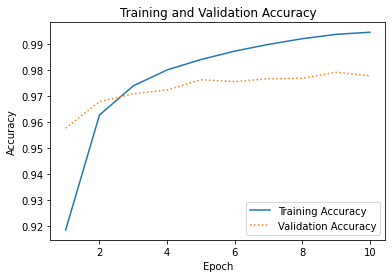

In [9]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

How accurate is the model?

In [10]:
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]:.1%}')

Accuracy: 97.8%


Show one of the test images.

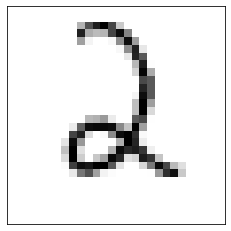

In [11]:
test_image = test_images[47]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

Use the test image to make a prediction.

In [12]:
x = test_image.reshape(1, 28 * 28) / 255
model.predict(x)

array([[1.1786374e-09, 3.0937578e-08, 9.9999976e-01, 8.5566683e-08,
        9.1340338e-11, 3.7483711e-11, 1.1739887e-07, 1.7095090e-09,
        4.8984630e-09, 3.3706683e-14]], dtype=float32)

Get the predicted class.

In [13]:
import numpy as np

predicted_class = np.argmax(model.predict(x), axis=-1)[0]
print('Looks like a ' + str(predicted_class) + '!')

Looks like a 2!
